In [1]:
import warnings
warnings.filterwarnings("ignore")

### Import libraries

In [27]:
import numpy as np
import pandas as pd
from sklearn import neighbors, tree, linear_model
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, KFold
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import lightgbm as ltb
from xgboost import XGBRegressor, DMatrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor


### Libraries for visualization
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [135]:
cd ..

C:\Users\akshi\Documents\Semesters\Semester2\Predictive Analytics\Week7_10


In [3]:
column_names=['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our',
              'word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail',
              'word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses',
              'word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit',
              'word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl',
              'word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857',
              'word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999',
              'word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting',
              'word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table',
              'word_freq_conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#',
              'capital_run_length_average','capital_run_length_longest','capital_run_length_total','spam_flag'
]

In [4]:
df=pd.read_csv('spambase.data', index_col= False, names= column_names)
display(df.head())
print(df.shape)
print(df['spam_flag'].value_counts())

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_flag
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


(4601, 58)
0    2788
1    1813
Name: spam_flag, dtype: int64


In [5]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_flag
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [6]:
## Removing outliers and then checking spambase counts
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(df)
y_noano = clf.predict(df)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

df = df.iloc[y_noano[y_noano['Top'] == 1].index.values]
df.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", df.shape[0])

Number of Outliers: 66
Number of rows without outliers: 4535


In [7]:
### Checking distribution of spam and non spam mails
print(df['spam_flag'].value_counts())
df.describe()

0    2722
1    1813
Name: spam_flag, dtype: int64


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_flag
count,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,...,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000
mean,0.105830,0.212809,0.283541,0.066377,0.314536,0.097297,0.115870,0.106351,0.090959,0.237832,...,0.038987,0.130755,0.016377,0.272680,0.076903,0.044730,5.227416,52.751268,286.389416,0.399779
std,0.306952,1.294934,0.505803,1.405247,0.674589,0.275564,0.394036,0.403134,0.279763,0.644258,...,0.245173,0.260443,0.108829,0.821002,0.247496,0.432403,31.958061,196.244643,610.170308,0.489907
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.575000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.062000,0.000000,0.000000,0.000000,0.000000,2.258000,15.000000,96.000000,0.000000
75%,0.000000,0.000000,0.425000,0.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.180500,0.000000,0.325000,0.055000,0.000000,3.731500,44.000000,272.500000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


### Train Logistic Regression Model

In [8]:
#create a dataframe with all training data except the target column
X = df.drop(columns=['spam_flag'])
#check that the target variable has been removed
display(X.head())

#separate target values
y = df['spam_flag'].values
#view target values
print("\n displaying target variable Y: ")
y[0:5]

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191



 displaying target variable Y: 


array([1, 1, 1, 1, 1], dtype=int64)

In [9]:
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                        random_state=1, stratify=y)

In [10]:
### Scaling the dataset
scaler = MinMaxScaler()
# transform data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
print(X_train_scaled.shape, X_test_scaled.shape)

(3174, 57) (1361, 57)


### KNN Multi class classifier

In [12]:
### Initializing grid for identifying best paramters
grid_params_knn= {'n_neighbors':range(3,10),
                  'weights':['uniform','distance'],
                  'metric':['euclidean','manhattan','minkowski']}
# KNN Classifier
model = KNeighborsClassifier()
NUM_TRIALS= 3
# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    inner_cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=i)
    outer_cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=model, param_grid=grid_params_knn, cv=inner_cv, scoring='accuracy')
    clf.fit(X_train_scaled, y_train)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_train_scaled, y=y_train, cv=outer_cv)
    nested_scores[i] = nested_score.mean()
    print(i)

0
1
2


In [13]:
### Model performance
score_difference = non_nested_scores - nested_scores
print(clf.best_params_)
print("Average non_nested_scores {0:6f} and average nested_scores {1:6f}."
      .format(non_nested_scores.mean(), nested_scores.mean()))
print("Average difference of {0:6f} with std. dev. of {1:6f}."
      .format(score_difference.mean(), score_difference.std()))

{'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}
Average non_nested_scores 0.904817 and average nested_scores 0.903522.
Average difference of 0.001295 with std. dev. of 0.000602.


In [14]:
### Training the model based on hyperparameter tuning by grid search
clf_knn = KNeighborsClassifier(metric='manhattan', 
              n_neighbors=8, 
              weights='distance')
### using standardized data because using regularization
clf_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=8, weights='distance')

In [15]:
### Fitting the model on the test data
y_test_hat=clf_knn.predict(X_test_scaled) 

Accuracy for the testing dataset with tuning is : 91.26%
F-Measure: 0.912
Recall: 0.913
Precision: 0.913
MCC: 0.817
Cohen's Kappa Score: 0.815

Test confusion_matrix
[[778  39]
 [ 80 464]]


Text(33.0, 0.5, 'True')

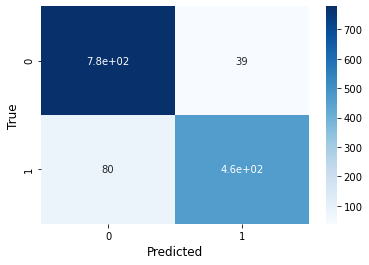

In [19]:
test_accuracy=accuracy_score(y_test,y_test_hat)*100
print("Accuracy for the testing dataset with tuning is : {:.2f}%".
      format(test_accuracy) )
test_fscore = f1_score(y_test, y_test_hat, average='weighted')
print('F-Measure: %.3f' % test_fscore)
test_recall = recall_score(y_test, y_test_hat, average='weighted')
print('Recall: %.3f' % test_recall)
test_precision = precision_score(y_test, y_test_hat, average='weighted')
print('Precision: %.3f' % test_precision)
cf_matrix = confusion_matrix(y_test, y_test_hat)
print("MCC: %.3f"% matthews_corrcoef(y_test, y_test_hat))
print("Cohen's Kappa Score: %.3f"% cohen_kappa_score(y_test, y_test_hat))
print("\nTest confusion_matrix")
print(cf_matrix)
sns.heatmap(cf_matrix, cmap='Blues', annot= True)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

### Cost matrix

Text(0, 0.5, 'Cost')

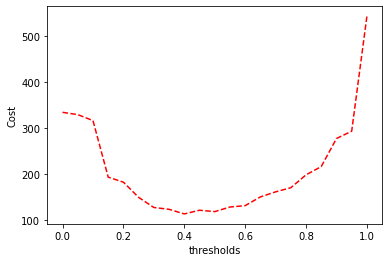

In [54]:
## Cost matrix 1
predict_probabilities = clf_knn.predict_proba(X_test_scaled)[:,1] ##get prediction probability of label 1 
thresholds = np.linspace(0, 1.0, num=21)
Cost_List=np.linspace(0, 1.0, num=21)
#input cost matrix
cost_matrix = np.array([[0, 1], [1, 0]])
index=0

for t in thresholds:
    predict_thre = np.where(predict_probabilities > t, 1, 0)  ##prediction based on the preset threshold
    clf_matrix = confusion_matrix(y_test, predict_thre)
    Cost_List[index] = clf_matrix[0][0]*cost_matrix[0][0]+clf_matrix[0][1]*cost_matrix[0][1]+clf_matrix[1][0]*cost_matrix[1][0]+clf_matrix[1][1]*cost_matrix[1][1] ##note this only applies to binary classification
    index+=1
    
plt.figure(1)
plt.plot(thresholds, Cost_List, 'r--')
plt.xlabel("thresholds")
plt.ylabel("Cost")

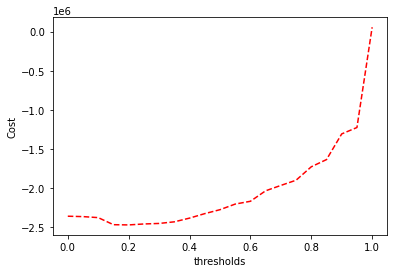

In [65]:
## Cost matrix 2
predict_probabilities = clf_knn.predict_proba(X_test_scaled)[:,1] ##get prediction probability of label 1 
thresholds = np.linspace(0, 1.0, num=21)
Cost_List=np.linspace(0, 1.0, num=21)
#input cost matrix
cost_matrix = np.array([[0, 1000], [100, -5000]])
index=0

for t in thresholds:
    predict_thre = np.where(predict_probabilities > t, 1, 0)  ##prediction based on the preset threshold
    clf_matrix = confusion_matrix(y_test, predict_thre)
    Cost_List[index] = clf_matrix[0][0]*cost_matrix[0][0]+clf_matrix[0][1]*cost_matrix[0][1]+clf_matrix[1][0]*cost_matrix[1][0]+clf_matrix[1][1]*cost_matrix[1][1] ##note this only applies to binary classification
    index+=1
    
plt.figure(1)
plt.plot(thresholds, Cost_List, 'r--')
plt.xlabel("thresholds")
plt.ylabel("Cost")
plt.show()
plt.show()

In [56]:
Cost_List

array([-1903000., -2347600., -2400400., -2438300., -2485000., -2514900.,
       -2535800., -2506000., -2489500., -2475800., -2458300., -2406200.,
       -2385700., -2365000., -2320000., -2278100., -2199500., -2168800.,
       -2088100., -1848200.,    54400.])

### Logistic regression classifier

In [20]:
## using Grid Search CV
model = linear_model.LogisticRegression(solver='lbfgs', multi_class='multinomial')
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['penalty'] = ['l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

NUM_TRIALS= 5
# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    inner_cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=i)
    outer_cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=model, param_grid=space, cv=inner_cv, scoring='accuracy')
    clf.fit(X_train_scaled, y_train)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_train_scaled, y=y_train, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

In [22]:
### Model performance
score_difference = non_nested_scores - nested_scores
print(clf.best_params_)
print("Average non_nested_scores {0:6f} and average nested_scores {1:6f}."
      .format(non_nested_scores.mean(), nested_scores.mean()))
print("Average difference of {0:6f} with std. dev. of {1:6f}."
      .format(score_difference.mean(), score_difference.std()))

{'C': 100, 'penalty': 'l2'}
Average non_nested_scores 0.920353 and average nested_scores 0.920353.
Average difference of 0.000000 with std. dev. of 0.000000.


In [23]:
### Training the model based on hyperparameter tuning by grid search
clf3 = linear_model.LogisticRegression(C=100,solver ='lbfgs', multi_class='multinomial',
                                       penalty='l2')
### using standardized data because using regularization
clf3.fit(X_train_scaled, y_train)

LogisticRegression(C=100, multi_class='multinomial')

In [24]:
### Fitting the model on the test data
y_test_hat=clf3.predict(X_test_scaled) 

Accuracy for the testing dataset with tuning is : 91.92%
F-Measure: 0.920
Recall: 0.919
Precision: 0.921
MCC: 0.835
Cohen's Kappa Score: 0.833

Test confusion_matrix
[[744  73]
 [ 37 507]]


Text(33.0, 0.5, 'True')

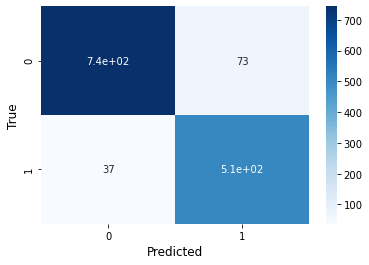

In [25]:
test_accuracy=accuracy_score(y_test,y_test_hat)*100
print("Accuracy for the testing dataset with tuning is : {:.2f}%".
      format(test_accuracy) )
test_fscore = f1_score(y_test, y_test_hat, average='weighted')
print('F-Measure: %.3f' % test_fscore)
test_recall = recall_score(y_test, y_test_hat, average='weighted')
print('Recall: %.3f' % test_recall)
test_precision = precision_score(y_test, y_test_hat, average='weighted')
print('Precision: %.3f' % test_precision)
cf_matrix = confusion_matrix(y_test, y_test_hat)
print("MCC: %.3f"% matthews_corrcoef(y_test, y_test_hat))
print("Cohen's Kappa Score: %.3f"% cohen_kappa_score(y_test, y_test_hat))
print("\nTest confusion_matrix")
print(cf_matrix)
sns.heatmap(cf_matrix, cmap='Blues', annot= True)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

### Cost matrix

Text(0, 0.5, 'Cost')

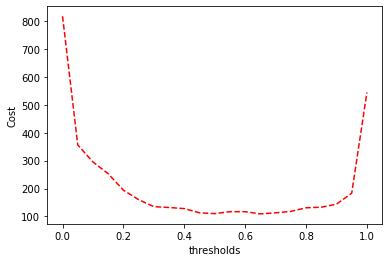

In [52]:
## Cost matrix 1
predict_probabilities = clf3.predict_proba(X_test_scaled)[:,1] ##get prediction probability of label 1 
thresholds = np.linspace(0, 1.0, num=21)
Cost_List=np.linspace(0, 1.0, num=21)
#input cost matrix
cost_matrix = np.array([[0, 1], [1, 0]])
index=0

for t in thresholds:
    predict_thre = np.where(predict_probabilities > t, 1, 0)  ##prediction based on the preset threshold
    clf_matrix = confusion_matrix(y_test, predict_thre)
    Cost_List[index] = clf_matrix[0][0]*cost_matrix[0][0]+clf_matrix[0][1]*cost_matrix[0][1]+clf_matrix[1][0]*cost_matrix[1][0]+clf_matrix[1][1]*cost_matrix[1][1] ##note this only applies to binary classification
    index+=1
    
plt.figure(1)
plt.plot(thresholds, Cost_List, 'r--')
plt.xlabel("thresholds")
plt.ylabel("Cost")

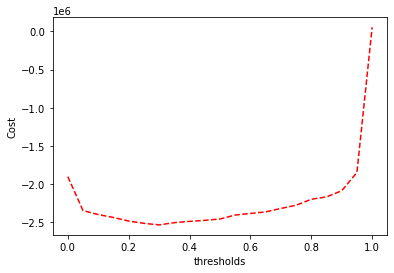

In [53]:
## Cost matrix 2
predict_probabilities = clf3.predict_proba(X_test_scaled)[:,1] ##get prediction probability of label 1 
thresholds = np.linspace(0, 1.0, num=21)
Cost_List=np.linspace(0, 1.0, num=21)
#input cost matrix
cost_matrix = np.array([[0, 1000], [100, -5000]])
index=0

for t in thresholds:
    predict_thre = np.where(predict_probabilities > t, 1, 0)  ##prediction based on the preset threshold
    clf_matrix = confusion_matrix(y_test, predict_thre)
    Cost_List[index] = clf_matrix[0][0]*cost_matrix[0][0]+clf_matrix[0][1]*cost_matrix[0][1]+clf_matrix[1][0]*cost_matrix[1][0]+clf_matrix[1][1]*cost_matrix[1][1] ##note this only applies to binary classification
    index+=1
    
plt.figure(1)
plt.plot(thresholds, Cost_List, 'r--')
plt.xlabel("thresholds")
plt.ylabel("Cost")
plt.show()
plt.show()

### SVM classifier

In [28]:
# Set up possible values of parameters to optimize over
p_grid = [{'kernel': ['rbf','poly'], 
           'gamma': [1e-3, 0.5, 1, 10],
           'C': [0.1, 1, 10]}]
# Support Vector Classifier
model = SVC()
NUM_TRIALS= 5
# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    inner_cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=i)
    outer_cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=model, param_grid=p_grid, cv=inner_cv, scoring='accuracy')
    clf.fit(X_train_scaled, y_train)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_train_scaled, y=y_train, cv=outer_cv)
    nested_scores[i] = nested_score.mean()
    print(i)

0
1
2
3
4


In [29]:
print(clf.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [35]:
### Training the model based on hyperparameter tuning by grid search
clf_svm = SVC(C=10,
              gamma= 1,
              kernel= 'rbf',
             probability=True)
### using standardized data because using regularization
clf_svm.fit(X_train_scaled, y_train)

### Fitting the model on the test data
y_test_hat=clf_svm.predict(X_test_scaled) 

Accuracy for the testing dataset with tuning is : 93.09%
F-Measure: 0.931
Recall: 0.931
Precision: 0.931
MCC: 0.857
Cohen's Kappa Score: 0.857

Test confusion_matrix
[[764  53]
 [ 41 503]]


Text(33.0, 0.5, 'True')

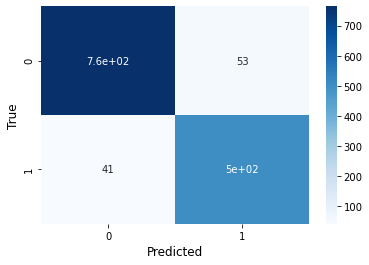

In [36]:
test_accuracy=accuracy_score(y_test,y_test_hat)*100
print("Accuracy for the testing dataset with tuning is : {:.2f}%".
      format(test_accuracy) )
test_fscore = f1_score(y_test, y_test_hat, average='weighted')
print('F-Measure: %.3f' % test_fscore)
test_recall = recall_score(y_test, y_test_hat, average='weighted')
print('Recall: %.3f' % test_recall)
test_precision = precision_score(y_test, y_test_hat, average='weighted')
print('Precision: %.3f' % test_precision)
cf_matrix = confusion_matrix(y_test, y_test_hat)
print("MCC: %.3f"% matthews_corrcoef(y_test, y_test_hat))
print("Cohen's Kappa Score: %.3f"% cohen_kappa_score(y_test, y_test_hat))
print("\nTest confusion_matrix")
print(cf_matrix)
sns.heatmap(cf_matrix, cmap='Blues', annot= True)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

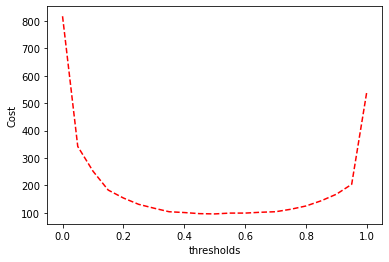

In [46]:
## Cost matrix 1
predict_probabilities = clf_svm.predict_proba(X_test_scaled)[:,1] ##get prediction probability of label 1 
thresholds = np.linspace(0, 1.0, num=21)
Cost_List=np.linspace(0, 1.0, num=21)
#input cost matrix
cost_matrix = np.array([[0, 1], [1, 0]])
index=0

for t in thresholds:
    predict_thre = np.where(predict_probabilities > t, 1, 0)  ##prediction based on the preset threshold
    clf_matrix = confusion_matrix(y_test, predict_thre)
    Cost_List[index] = clf_matrix[0][0]*cost_matrix[0][0]+clf_matrix[0][1]*cost_matrix[0][1]+clf_matrix[1][0]*cost_matrix[1][0]+clf_matrix[1][1]*cost_matrix[1][1] ##note this only applies to binary classification
    index+=1
    
plt.figure(1)
plt.plot(thresholds, Cost_List, 'r--')
plt.xlabel("thresholds")
plt.ylabel("Cost")
plt.show()

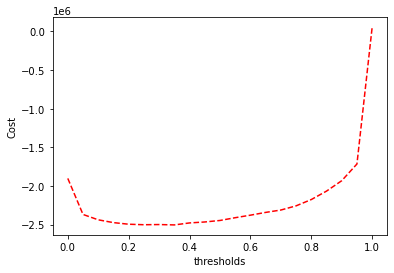

In [64]:
## Cost matrix 2
predict_probabilities = clf_svm.predict_proba(X_test_scaled)[:,1] ##get prediction probability of label 1 
thresholds = np.linspace(0, 1.0, num=21)
Cost_List=np.linspace(0, 1.0, num=21)
#input cost matrix
cost_matrix = np.array([[0, 1000], [100, -5000]])
index=0

for t in thresholds:
    predict_thre = np.where(predict_probabilities > t, 1, 0)  ##prediction based on the preset threshold
    clf_matrix = confusion_matrix(y_test, predict_thre)
    Cost_List[index] = clf_matrix[0][0]*cost_matrix[0][0]+clf_matrix[0][1]*cost_matrix[0][1]+clf_matrix[1][0]*cost_matrix[1][0]+clf_matrix[1][1]*cost_matrix[1][1] ##note this only applies to binary classification
    index+=1
    
plt.figure(1)
plt.plot(thresholds, Cost_List, 'r--')
plt.xlabel("thresholds")
plt.ylabel("Cost")
plt.show()

### Writeup

In [60]:
Results_test_data = {
    'Model Name':['SVM','Logistic Regression','KNN'],
    'Accuracy' : ['93.09%','92.92%','91.92%'],
    'F_Score' : ['0.931','0.92','0.92'],
    'Recall' : ['0.931','0.919','0.919'],
    'Precision' : ['0.931','0.921','0.921'],
    'MCC' : ['0.857','0.835','0.835'],
    'Cohens Kappa': ['0.857','0.833','0.833']
}

In [61]:
test_data_perf = pd.DataFrame(Results_test_data)
test_data_perf

,Model Name,Accuracy,F_Score,Recall,Precision,MCC,Cohens Kappa
0,SVM,93.09%,0.931,0.931,0.931,0.857,0.857
1,Logistic Regression,92.92%,0.92,0.919,0.921,0.835,0.833
2,KNN,91.92%,0.92,0.919,0.921,0.835,0.833


Model Performance based:
The best performance is achieved by SVM classifier out of Logistic Regression, KNN and SVM classifiers
that were tried. Not only, it has hugher base metrics like accuracy, precision, fscore.
But, it also has higher MCC & kappa. This signifies that it has better, effectively
distinguishable performance for the imbalanced classes.

Cost analysis based:
For the cost analysis, the minimal costs come up for 3 values at different thresholds.
For the KNN classifier, the threshold should be 0.2 to achieve minimum cost
For, Logistic and SVM classifiers, it should be 0.3
Logistic and SVM have pretty similar performances pertaining to cost.
This is also because they have similar performance.
The cost matrix has been designed in such a way that for every correctly identified spam,
the company is able to save USD5000 and for every incorrect identification of 
a correct mail, the company loses USD1000, or that is the cost company has to bear.
For every spam that is not identified, the company loses USD100

Based on the above statements and analysis on both cost and model performance, a SVM classifier should
be chosen as it would render best results in terms of both.